In [1]:
#!pip install wordcloud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS 


from PIL import Image
import numpy as np

In [8]:
# Reading the csv file and storing it in a dataframe called df.
df = pd.read_csv("data/netflix_clean.csv", index_col = 0)
df.head(2)

,title,director,cast,country,language,rating,genre,premiere,date_added,duration,imdb_score,genre2
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,English,PG-13,documentary,2020-10-02,2021-09-25,90.0,7.5,documentary
1,Extraction,Steven C. Miller,"Bruce Willis, Kellan Lutz, Gina Carano, D.B. S...","United States, United Kingdom, Canada",English,R,action,2020-04-24,2021-09-01,82.0,6.7,action


In [9]:
df.dtypes

title          object
director       object
cast           object
country        object
language       object
rating         object
genre          object
premiere       object
date_added     object
duration      float64
imdb_score    float64
genre2         object
dtype: object

In [10]:
df["date_added"] =pd.to_datetime(df["date_added"])
df["premiere"] =pd.to_datetime(df["premiere"])

# Peliculas por año
Basado en la premier y el año en el que se añadió a Netfli

In [11]:
df_ano_ad = df.groupby(df["date_added"].dt.year)["title"].count().reset_index()
df_ano_ad

,date_added,title
0,2015,10
1,2016,28
2,2017,57
3,2018,83
4,2019,107
5,2020,164
6,2021,64


In [12]:
df_año_pre = df.groupby(df["premiere"].dt.year)["title"].count().reset_index()
df_año_pre

,premiere,title
0,2014,1
1,2015,9
2,2016,28
3,2017,57
4,2018,85
5,2019,107
6,2020,164
7,2021,62


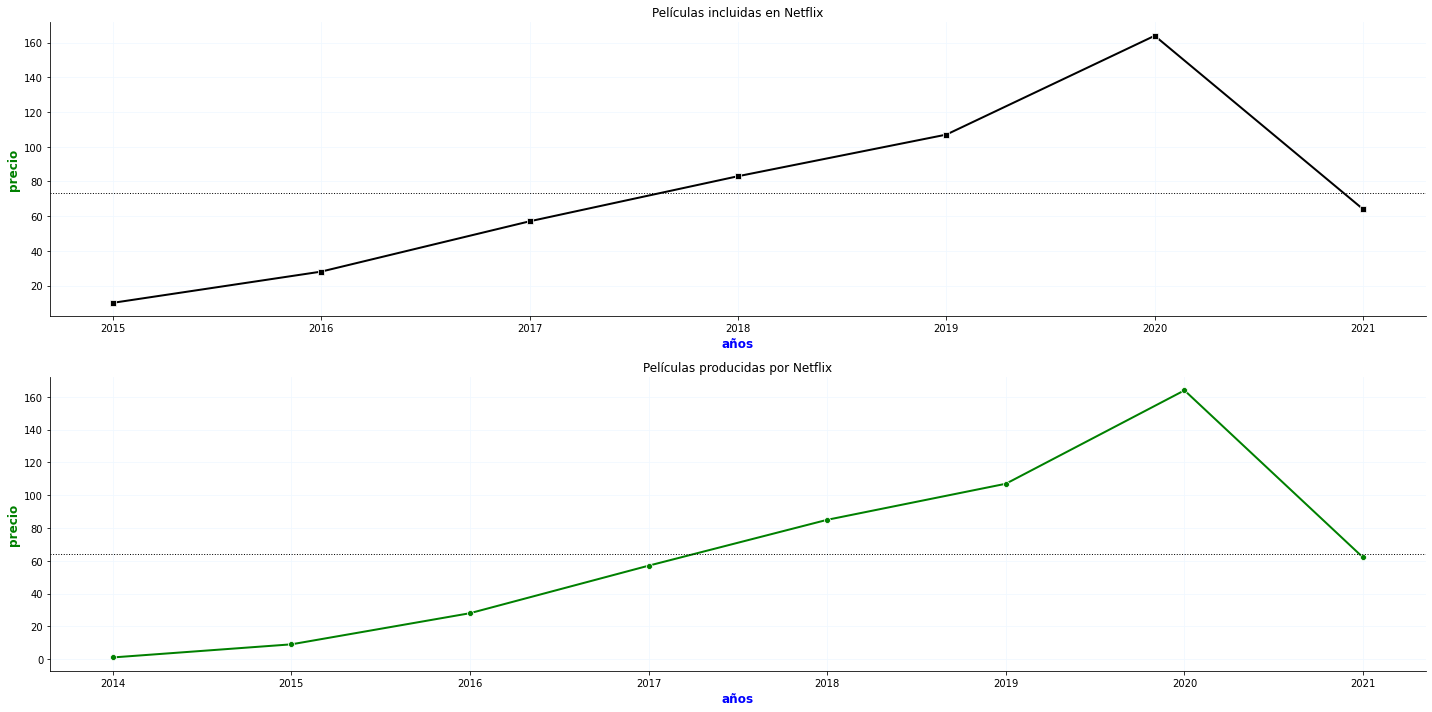

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20,10))

sns.lineplot(data = df_ano_ad, 
             x = "date_added", 
             y = "title", 
             marker = "s", 
             ax = axes[0], 
             linewidth = 2, 
             color = "black")

sns.lineplot(data = df_año_pre, 
             x = "premiere", 
             y = "title",
             marker = "o", 
             ax = axes[1], 
             linewidth = 2, 
             color = "green" )

axes[0].set_title("Películas incluidas en Netflix")
axes[1].set_title("Películas producidas por Netflix")


# para quitar los ejes de arriba y de la derecha         
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)        

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)


# para cambiar el nombre el eje x
axes[0].set_xlabel('años', color = "blue", fontweight = "bold", fontsize = 12)
axes[1].set_xlabel('años', color = "blue", fontweight = "bold", fontsize = 12)

# para cambiar el nombre el eje y
axes[0].set_ylabel('precio', color = "green", fontweight = "bold", fontsize = 12)
axes[1].set_ylabel('precio', color = "green", fontweight = "bold", fontsize = 12)




# para añadir un grid/rejilla a la gráfica
axes[0].grid(visible=True, color = "aliceblue")
axes[1].grid(visible=True, color = "aliceblue")

media_aña = df_ano_ad["title"].mean()
media_pre = df_año_pre["title"].mean()



# para añadir una linea fija en el plot
axes[0].axhline(media_aña, color='black', linewidth=1, linestyle='dotted'); # las opciones que tenemos de estilo de linea '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
axes[1].axhline(media_pre, color='black', linewidth=1, linestyle='dotted'); # las opciones que tenemos de estilo de linea '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'


fig.tight_layout();

Para más marcadores [aqui](https://matplotlib.org/3.1.0/api/markers_api.html)

# Creditos de actores y directores

In [83]:
df_directors = pd.read_csv("data/top10_directors.csv", sep = ";")
df_actors = pd.read_csv("data/top10_actors.csv", sep = ";")

In [86]:
df_actors.head(2)

,name,image,description,positions,known_for,Banda sonora,Guion y continuidad,Composición,sonido de archivo,Música,Como sí mismos,Agradecimientos,metraje de archivo,Producción,Dirección,Equipos adicionales
0,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,El aguador,34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN
1,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,"6,1",34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN


In [113]:
nuevo_orden = ['name', 'image', 'description', 'positions', 'known_for',
       'Banda sonora', 'Guion y continuidad', 'Composición',
       'sonido de archivo', 'Música',  'Agradecimientos',
       'metraje de archivo', 'Producción', 'Dirección', 'Equipos adicionales', 'Como sí mismos']
df_actors = df_actors.reindex(columns = nuevo_orden)

In [115]:
df_actors.head(2)

,name,image,description,positions,known_for,Banda sonora,Guion y continuidad,Composición,sonido de archivo,Música,Agradecimientos,metraje de archivo,Producción,Dirección,Equipos adicionales,Como sí mismos
0,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,El aguador,34.0,7.0,3.0,2.0,1.0,10.0,80.0,NaN,NaN,NaN,256.0
1,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,"6,1",34.0,7.0,3.0,2.0,1.0,10.0,80.0,NaN,NaN,NaN,256.0


¿De que actor quieres ver las métricas? ['Adam Sandler', 'Maya Rudolph', 'Andrew Bachelor', 'Keegan-Michael Key', 'Robbie Amell', 'Jacki Weaver', 'Rob Schneider', 'Nick Swardson', 'Lakeith Stanfield', 'Zachary Quinto']Andrew Bachelor


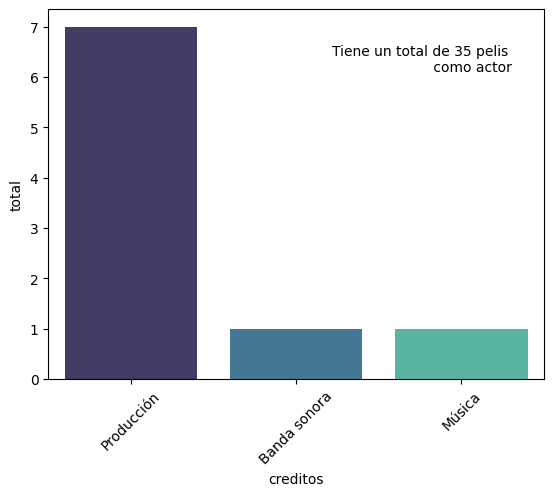

In [169]:
actor = input(f"¿De que actor quieres ver las métricas? {df_actors['name'].unique().tolist()}")

df_seleccion = df_actors[df_actors["name"] == actor ]
total_pelis_actor = int(df_seleccion["Como sí mismos"].unique()[0])
df_seleccion_filtrado = df_seleccion.iloc[:, 5:-1].head(1).T.reset_index()
df_seleccion_filtrado.columns = ["creditos", "total"]
df_seleccion_filtrado.dropna(inplace = True)
df_seleccion_filtrado.sort_values(by = "total", ascending = False, inplace = True)

sns.barplot(data = df_seleccion_filtrado, x = "creditos", y = "total", palette= "mako")
plt.figtext(0.85, 0.75, f'Tiene un total de {total_pelis_actor} pelis \n como actor', horizontalalignment='right'  )
plt.xticks(rotation=45);

# Películas por género

In [31]:
df.head(2)

,title,director,cast,country,language,rating,genre,premiere,date_added,duration,imdb_score,genre2
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,English,PG-13,documentary,2020-10-02,2021-09-25,90.0,7.5,documentary
1,Extraction,Steven C. Miller,"Bruce Willis, Kellan Lutz, Gina Carano, D.B. S...","United States, United Kingdom, Canada",English,R,action,2020-04-24,2021-09-01,82.0,6.7,action


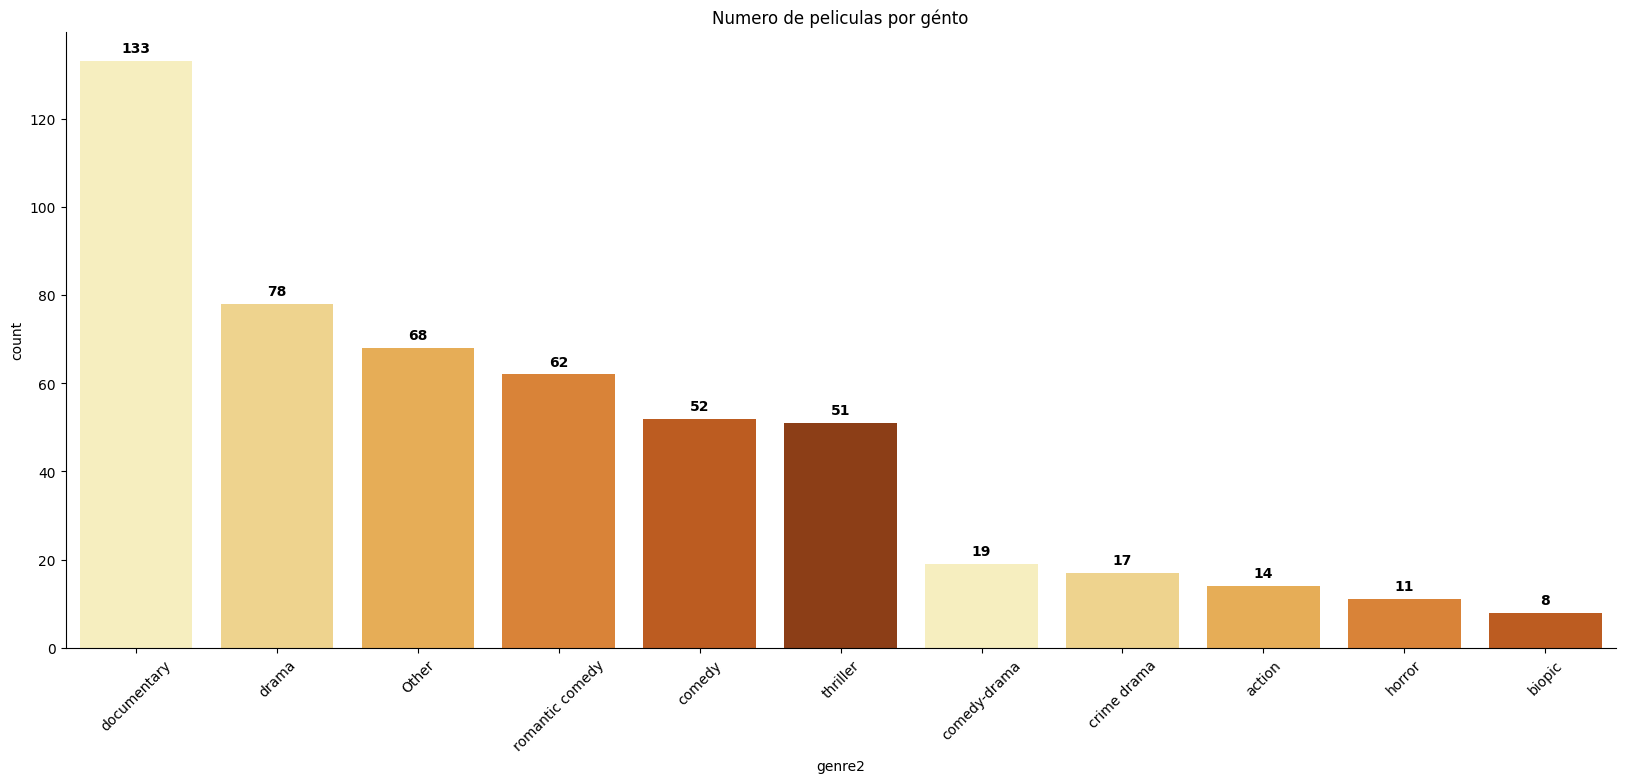

In [60]:
plt.figure(figsize =(20,8)) # para establecer el tamaño de la gráfica
fig = sns.countplot(data = df, x = "genre2",  
                    palette=sns.color_palette("YlOrBr"), 
                    order = df["genre2"].value_counts().index) 
plt.xticks(rotation=45) # para girar las etiquetas del eje-x
plt.title("Numero de peliculas por génto")

ejex = df["genre2"].value_counts().index.tolist()
ejey = df["genre2"].value_counts().values.tolist()

for valor, etiqueta in zip(range(len(ejex)), ejey):
    fig.annotate(etiqueta, # el valor que queremos poner encima de las barras
                 (valor, etiqueta + 2), # las coordenadas de las posiciones de las etiquetas
                 fontweight = "bold" , # si queremos la letra en negrita
   
                 horizontalalignment='center' ) # para centrar la leyenda en el centro de la barra
# para quitar los ejes de arriba y de la derecha         
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)        

plt.show();

# Nube de palabras

In [67]:
def generate_cloud_normal(column, filename):

    # Joining all the words in the description column into one string.
    text = " ".join(cat for cat in df[column])

    word_cloud = WordCloud(
        width=7000,
        height=2000,
        background_color="black",
        colormap="OrRd",
        collocations=True,
        stopwords=STOPWORDS,
        ).generate(text)

    # Showing the word cloud.
    plt.imshow(word_cloud)


    # Turning off the axis.
    plt.axis("off")

    # Showing the word cloud.
    plt.show()

    word_cloud.to_file(f'data/{filename}.png')

In [68]:
df.head(2)

,title,director,cast,country,language,rating,genre,premiere,date_added,duration,imdb_score,genre2
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,English,PG-13,documentary,2020-10-02,2021-09-25,90.0,7.5,documentary
1,Extraction,Steven C. Miller,"Bruce Willis, Kellan Lutz, Gina Carano, D.B. S...","United States, United Kingdom, Canada",English,R,action,2020-04-24,2021-09-01,82.0,6.7,action


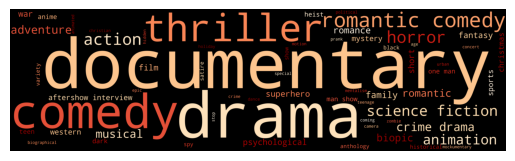

In [69]:
generate_cloud_normal("genre", "genre" )

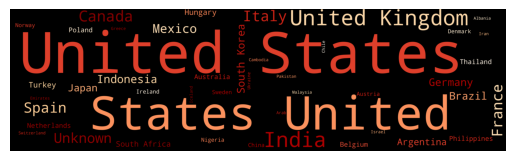

In [70]:
generate_cloud_normal("country", "country_normal" )